In [17]:
# You will need to install the following python pacakges use pip install ...
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# these do not need to be installed
import glob
from utilities import clip_station, list_clipped_stations,plot_event

### Set and read relevant data
Its assumed you will be running from your desktop and you have access to ASU dropbox and the Hawaii_Research_WR folder. You will need to specify the first part of the absolute path to the dropbox.

In [18]:
path_to_drop_box = '/Users/wr' #modif this
rain_directory = f"{path_to_drop_box}/Dropbox (ASU)/Hawaii_Research_WR/Climate/rainfall/Huang_et_al_dataset"
metadata = pd.read_csv(f"{path_to_drop_box}/Dropbox (ASU)/Hawaii_Research_WR/Climate/rainfall/Huang_et_al_dataset/meta/metadata_pub_V20220401.csv")

# import Jiya's selected events, note some events and rainfall data do not overlap temporally
hicyc_df = pd.read_csv(f"{path_to_drop_box}/Dropbox (ASU)/Hawaii_Research_WR/Climate/Hawaii_Hurricane_Data.csv")
hicyc_df['Start'] = pd.to_datetime(hicyc_df['Start'])
hicyc_df['End'] = pd.to_datetime(hicyc_df['End'])

coast = gpd.read_file(f"{path_to_drop_box}/Dropbox (ASU)/Hawaii_Research_WR/GIS/Coastline/Coastline.shp")

### Example: create list of dataframes for a date range and plot 

See list of events:

In [22]:
hicyc_df

,Name,Start,End,Nearest to HI (location),Nearest Date,Catagory,Information
0,ANA,2014-10-17,2014-10-20,Honolulu,10/19/14,C1,NaN
1,Darby,2016-07-23,2016-07-26,"Big island, Kauai",07/24-25/2016,Tropical storm,hitting Hawaiian island(24) and Kauai(25)
2,Dalalia,1989-07-20,1989-07-21,Big island,7/20/89,TS,Went closely through
3,Dot,1959-08-05,1959-08-07,Kauai,8/7/59,C3,A C4 storm dissapearing into tropical storm
4,Daniel,1987-07-21,1987-07-22,Big island,7/22/87,TD,Goes through the West shore of northern region...
5,Douglas,2020-07-26,2020-07-27,Maui,7/27/20,C1,Storm through East of the island
6,Eugene,1993-07-24,1993-07-25,Big Island,7/24/93,Tropical Depression,NaN
7,FEFA,1991-08-07,1991-08-08,Big Island,8/8/91,TD,NaN
8,Flossie,2019-08-05,2019-08-09,Maui,8/6/19,TD,NaN
9,Iniki,1992-09-11,1992-09-12,Kauai,9/12/92,C4,Straight and only through Kauai


You can lot all of the islands for a specifi event, the only thing that needs to be specified is the numeric indexes in hicyc_df.Start[] and hicyc_df.End[]

/Users/wr/Documents/Repos/hi-rain/utilities.py:62: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(station_file)


Cannot find file: /Users/wr/Dropbox (ASU)/Hawaii_Research_WR/Climate/rainfall/Huang_et_al_dataset/911860-22534.csv, skipping...
Cannot find file: /Users/wr/Dropbox (ASU)/Hawaii_Research_WR/Climate/rainfall/Huang_et_al_dataset/911905-22524.csv, skipping...


/Users/wr/Documents/Repos/hi-rain/utilities.py:62: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(station_file)
/Users/wr/Documents/Repos/hi-rain/utilities.py:62: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(station_file)
/Users/wr/Documents/Repos/hi-rain/utilities.py:62: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(station_file)


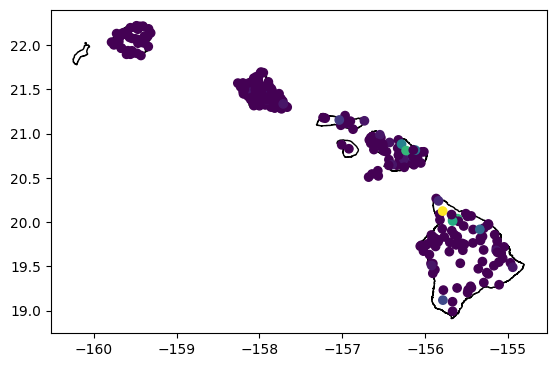

In [24]:
ax,rf_totals,lats,lons = plot_event(rain_directory,[hicyc_df.Start[13],hicyc_df.End[13]],coast,metadata)

Only plot a specific island: Kauai and Iniki (iniki is index 9 in hicyc_df). Do do this you just past the optional argument island, e.g. island='Kauai'. Needs to be capitalized.

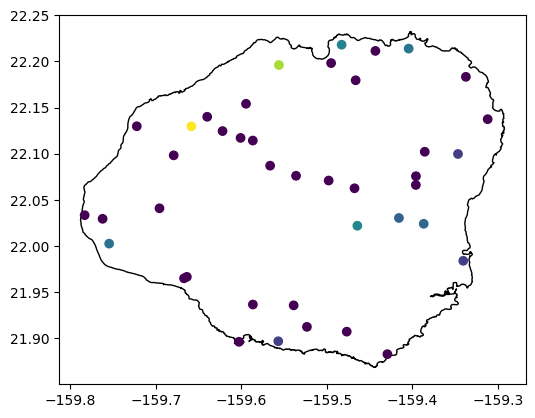

In [23]:
ax,rf_totals,lats,lons = plot_event(rain_directory,[hicyc_df.Start[9],hicyc_df.End[9]],coast,metadata,island='Kauai')

Plot histogram of rainfall totals

(array([268.,  10.,   5.,   4.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([  0.   ,  24.892,  49.784,  74.676,  99.568, 124.46 , 149.352,
        174.244, 199.136, 224.028, 248.92 ]),
 <BarContainer object of 10 artists>)

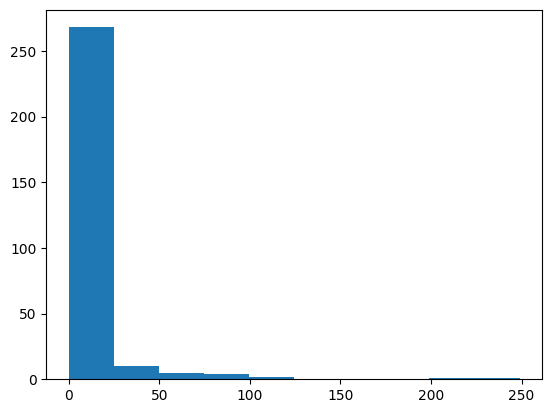

In [8]:
plt.hist(rf_totals)